In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

# Lecture 8

### Missingness Mechansisms

## Imperfect Data

<img src="imgs/image_0.png">

* The "true" (probability) model is an idealized approximation of the Data Generating Process.
* The data generating process is the phenomenon we want to understand.
* The recorded data is *supposed* to "well represent" the data generating process.

## Imperfect Data

<img src="imgs/image_1.png">

* Problem 1: your data is not representative? (poor sample of events).
* Problem 2: your recording process is incomplete.

These are only problems when there is *systematic bias* in the result!

## Imperfect Data

* Non-representative samples are identified with domain research!
    - Does the description of the data look like your understanding of the data generating process? (Salaries are only for tech people)
* Incomplete measurements are missing data!
    - Understanding how *portions* of your data are missing affects the quality of your sample.
    - There are techniques to understand when missing measurements are representative of the rest of the sample.

# Understanding How Data is Absent

* Missing by Design (MD)
    
* Ignorable Missing Data:
    - Unconditionally ignorable (Missing Completely at Random: MCAR)
    - Conditionally ignorable (Missing at Random: MAR)
    
* Non-Ignorable Missing Data (Not Missing at Random: NMAR)

[(see wikipedia synopsis)](https://en.wikipedia.org/wiki/Missing_data)

## Missing by Design (MD)

<div class="image-txt-container">
    

* The field being absent is deterministic. 
* A function of the rows of the dataset that can:
    - exactly predict when a colum will be null,
    - with only knowledge of the other columns.


<img src="imgs/skiplogic.png"/>

</div>

* Example: Police dataset: "Contraband found" and "Searched"

    
[(reference)](https://stats.stackexchange.com/questions/201782/meaning-of-missing-by-design-in-longitudinal-studies)

# Unconditionally ignorable (MCAR: missing completely at random)

<div class="image-txt-container">

* The missing value isn't associated to the (actual, unreported) value itself, nor the values in any other fields.
* The missingness is unconditionally uniform across rows.
* Example 1: follow-up survey questions on a random sample of respondents.
* Example 2: Water damage to paper forms prior to entry (assuming shuffled forms).

<img src="imgs/water.jpg" width="50%"/>

</div>

# Conditionally Ignorable (MAR: Missing at Random)

<div class="image-txt-container">

* A missing value may depend only on values of other fields, but not its own.
* The missingness is uniform across rows, perhaps conditional on another column.
* Example 1: For really sick patients, clinicians may not draw blood for routine labs.
* Example 2: People working in a Service Industry are less likely to report their income.

<img src="imgs/tip.jpg" width="50%"/>

</div>

# Non-Ignorable (NMAR: Not missing at Random), can't model from the data

* A missing value depends on the value of the (actual, unreported) variable that's missing.
* Example 1: people with high income are less likely to report income.
* Example 2: a person doesn't take a drug test because they took drugs the day before.


### Discussion Questions

For each of the following datasets, decide whether they are MD, MCAR, MAR, NMAR:

* Self-reported income in the *follow-up* questionnaire of the census.
* A table (for a medical study) with column `gender` and column `age`. Age has missing values.
* Measurements from the Hubble Space Telescope (dropped data during transmission).
* The serial number of returned Macbook Pros, in a table of order information. 
* SAT scores reported by an institution for College Ranking scores.
* A table with a single column: self-reported education (with missing values).
* Midterm report with three columns (`ver.1`, `ver.2`, `ver.3`). ⅔ of the entries in the report are `NaN`.



### Diagnosis of missingness:

* Depends on the dataset and its attributes.
* Depends on the population / data generating processing under consideration.
* Requires understanding the severity and effect of each possible type of missingness.

Data with missing data is likely not a representative sample of the true population! 

##  Missing Summary

* **MCAR**: Data is *Unconditionally Ignorable* or *Missing Completely at Random* if there is no relationship between the missingness of the data and any values, observed or missing.
    - MCAR doesn't bias the observed data.

* **MAR**:  Data is *conditionally ignorable* or *Missing at Random* if there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data. 
    - MAR biases the observed data, but is fixable.

* **NMAR**: Data is *non-ignorable* or *"Not Missing at Random"* if there is a relationship between the propensity of a value to be missing and its values.
    - non-ignorable missing data biases the observed data in unobservable ways.

## Unconditionally Ignorable (MCAR) definition:

Suppose we have:
- a dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- a parameter $\psi$ independent of the dataset.

**MCAR**: Data is *Unconditionally ignorable* if 

$$Pr({\rm data\ is\ present\ } | Y_{obs}, Y_{mis}, \psi) = Pr({\rm data\ is\ present\ } |\ \psi)$$

That is, adding information on the dataset doesn't change likelihood data is missing!

## Conditionally ignorable (MAR) definition

Suppose we have:
- a dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- a parameter $\psi$ independent of the dataset.


**MAR**: Data is *Conditionally ignorable* if 

$$Pr({\rm data\ is\ present\ } | Y_{obs}, Y_{mis}, \psi) = Pr({\rm data\ is\ present\ } |\ Y_{obs}, \psi)$$

That is, *MAR data is actually MCAR, conditional on $Y_{obs}$*

## Non-ignorable missing data (NMAR ) definition

Suppose we have:
- a dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- a parameter $\psi$ independent of the dataset.


**NMAR**: Data is *non-ignorably missing* if 

$$Pr({\rm data\ is\ present\ }| Y_{obs}, Y_{mis}, \psi)$$

does not simplify. That is, in NMAR$ data, missingness is dependent on the missing value itself.

## How to assess the mechanism of missingness: NMAR
* Cannot determine NMAR from the data alone; it depends on the unobserved.
* Must be reasoned by the data generating process, or more data should be collected.
* How strong the dependence on $Y_{mis}$ influences the strength of NMAR
    - If the dependence on the missing values is weak, then *most* the missingness is explainable by observed values!

### Discussion Question

* Consider a dataset of survey data of people's self-reported weights.
    - The data contain an identifier and weight; nothing else.
* Is the data likely NMAR? Why?
* What data might you collect to make it not NMAR?

## How to assess the mechanism of missingness: MAR

* Data are MAR if missingness only depends on *obsvered* data.
* Data is MAR if it's determined to not be NMAR (assumption on data generating process).
* Adding further measurements may reduce the effect of NMAR.
    - income in census is NMAR; less so when adding geography, education, race...

## How to assess the mechanism of missingness: MCAR

Given the assumption of MAR, you can test if a data are MCAR.

A column `c_test` is MCAR if its missingness $R$ is independent of the data.
* For each column `c`, check that the missingness rates of `c_test` are the same across values of `c`.
* That is, the distribution of `c` when `c_test.isnull()` is 'the same' as the distribution of `c` when `c_test.notnull()`.
* The phrase 'the same' needs to be made statistically precise!

### Checking data are MCAR: heights data
* Start with complete dataset of child heights, sex of the child, and parent heights.
* Blank out rows to create MCAR data.

In [6]:
heights = pd.read_csv('data/galton.csv')

heights['child'] = heights.childHeight
heights = heights.drop(['family', 'midparentHeight', 'children', 'childNum', 'childHeight'], axis=1)
heights.head()

,father,mother,gender,child
0,78.5,67.0,male,73.2
1,78.5,67.0,female,69.2
2,78.5,67.0,female,69.0
3,78.5,67.0,female,69.0
4,75.5,66.5,male,73.5


In [7]:
heights.isnull().mean()

father    0.0
mother    0.0
gender    0.0
child     0.0
dtype: float64

In [8]:
# What are the data types?
# Gender: categorical
# father, mother and child: numerical

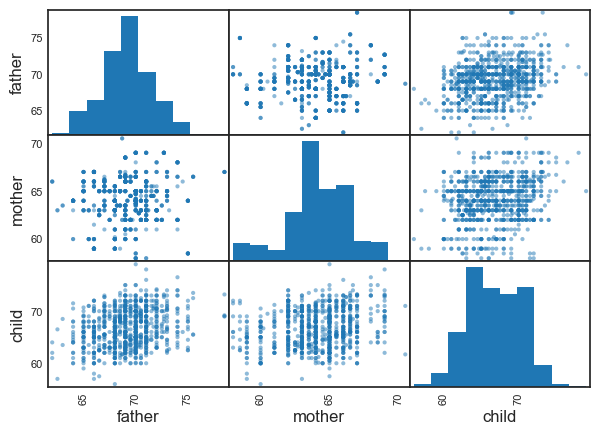

In [9]:
# distribution of heights
pd.plotting.scatter_matrix(heights.drop('gender', axis=1));

In [10]:
# create missing data
# How was it created?
np.random.seed(42)

heights_mcar = heights.copy()
idx = heights_mcar.sample(frac=0.3).index
heights_mcar.loc[idx, 'child'] = np.NaN

In [11]:
heights_mcar.isnull().mean()

father    0.000000
mother    0.000000
gender    0.000000
child     0.299786
dtype: float64

### Verifying that child heights are MCAR in `heights_mcar`
* Check the data look the 'same' when `height` is null vs not-null
    - Is the empirical distribution of gender similar for null/not-null?
    - Is the empirical distribution of heights similar for null/not-null?

In [12]:
heights_mcar.sample(n=10)

,father,mother,gender,child
885,65.0,65.0,male,69.0
42,73.0,67.0,male,71.0
134,71.0,67.0,male,69.0
66,73.0,64.0,female,NaN
245,70.0,69.0,female,62.0
642,68.0,64.0,female,65.0
596,68.0,65.5,female,NaN
35,74.0,62.0,female,68.0
859,65.0,67.0,male,66.5
212,71.0,62.0,male,NaN


In [13]:
# conditinal empirical distribution of gender by null and not-null

distr = (
    heights_mcar
    .assign(is_null=heights_mcar.child.isnull())
    .pivot_table(index='is_null', columns='gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

# rows add up to 1, proportion of male/female

gender,female,male
is_null,,
False,0.487768,0.512232
True,0.478571,0.521429


### Comparing Null vs. Non-Null (`child`) distributions: `gender`

* Are the distributions 'similar enough'? 
    - If yes, then missingness of `child` is *not* dependent on `gender`
* We have 
    - two groups: missing and not missing
    - We have distribution for these two groups
    - Are these distributions similar?
* Use a permutation test to assess the two distributions are similar.
* For categorical columns, use TVD as the test-statistic.

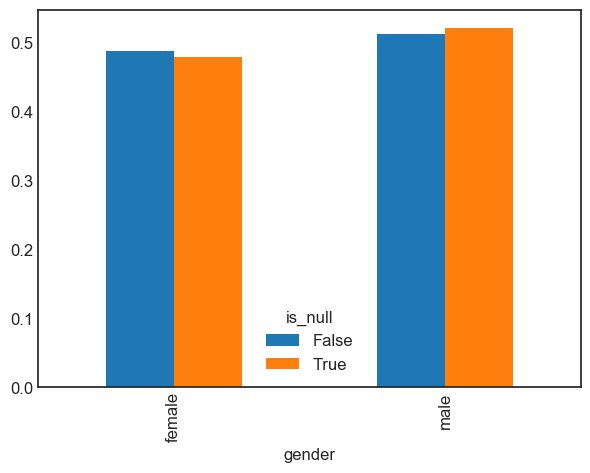

In [14]:
distr.T.plot(kind='bar');

In [20]:
n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        heights_mcar['gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        heights_mcar
        .assign(**{
            'gender': shuffled_col,
            'is_null': heights_mcar['child'].isnull()
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='gender', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)

In [19]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.009196155526430771

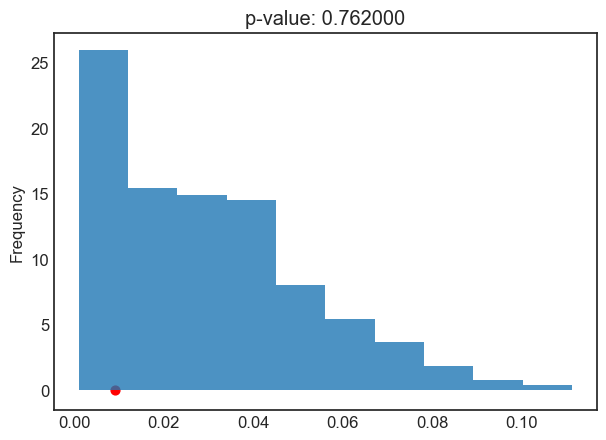

In [25]:
# The similrity is very high
pval = np.mean(tvds > obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

### Comparing Null vs. Non-Null (`child` height) distributions: `father` (height)

* Are the distributions 'similar enough'? 
    - If yes, then missingness of `child` is *not* dependent on height of `father`.
    - If no, then e.g. taller fathers are more likely to not report child height.
* In this case, it's 'clear' the distributions are similar.

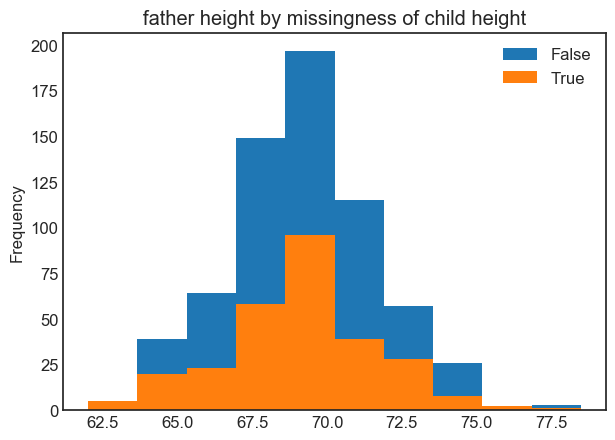

In [26]:
# heights: counts
# how much child data is missing?
# Shape? 
(
    heights_mcar
    .assign(is_null=heights_mcar.child.isnull())
    .groupby('is_null')
    .father
    .plot(kind='hist', legend=True, title='father height by missingness of child height')
);

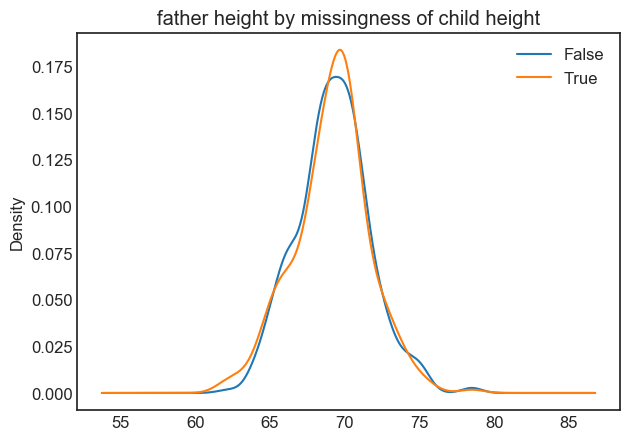

In [27]:
# heights: distributions
(
    heights_mcar
    .assign(is_null=heights_mcar.child.isnull())
    .groupby('is_null')
    .father
    .plot(kind='kde', legend=True, title='father height by missingness of child height')
);

### Child heights data: MAR
* MAR is an *assumption* from the data
    - Is it reasonable to assume that a missing `child` height is explainable using the gender of the child and the height of the parents?
* Once MAR is assumed, can show data is *not* MCAR
    - Show how missingness of `child` depends on other columns.

In [28]:
# build MAR dataset
# blank rows based on conditions


heights_mar = heights.copy()
for i, row in heights.iterrows():
    rand = np.random.uniform()
    if (row['father'] > 72) and rand < 0.5:
        heights_mar.loc[i, 'child'] = np.NaN
    elif (row['gender'] == 'female') and rand > 0.7:
        heights_mar.loc[i, 'child'] = np.NaN


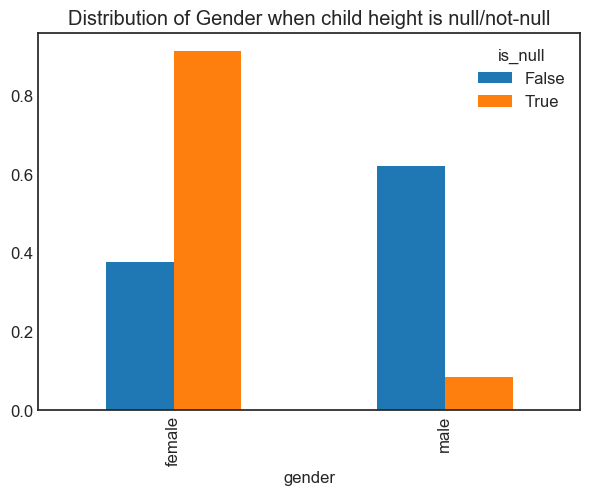

In [29]:
# different missingness rates -- not MCAR

distr = (
    heights_mar
    .assign(is_null=heights_mar.child.isnull())
    .pivot_table(index='is_null', columns='gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr.T.plot(kind='bar', title='Distribution of Gender when child height is null/not-null');

In [30]:
# How is it going to affect the stats of the child hights?
# It is going to create bias upward (larger than usual), 
# because women are shorter than man

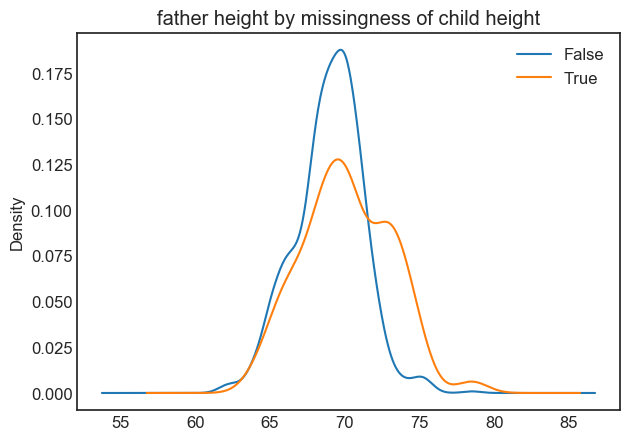

In [31]:
# Different missingness rates -- not MCAR
# Distribution of fathers heights when child's height is null/not null 
# Why is the right side of the graph different?

(
    heights_mar
    .assign(is_null=heights_mar.child.isnull())
    .groupby('is_null')
    .father
    .plot(kind='kde', legend=True, title='father height by missingness of child height')
);

### Missingness of `child` attribute: MAR case

* The distributions above are clearly different.
* What if their similarity was harder to determine? 
    - Permutation Test: are the distributions of column `X` when `child` is Null/Not-Null different?
* For dependence on a categorical attribute: use TVD for the test-statistic.
* For dependence on a quantitative attribute: ???

## When are two quantitative distributions 'the same'?
* Need a way to measure the 'distance' between distributions (i.e. a statistic)
* Are the differences in these distributions due to noise? or significant?
* Attempt #1:
    - If two distributions have different means, then they're likely different distributions!
    - Run a permutation test for differences in means.

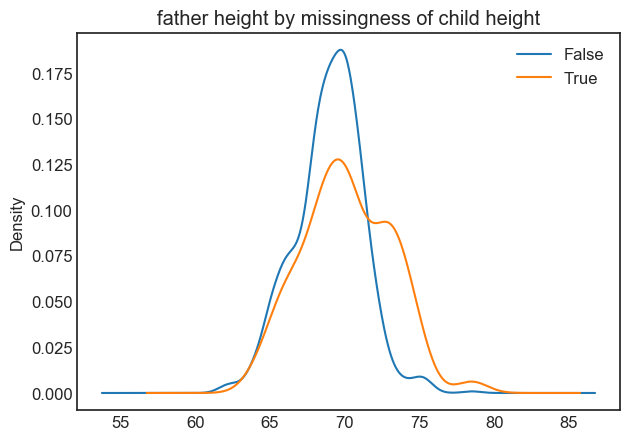

In [32]:
(
    heights_mar
    .assign(is_null=heights_mar.child.isnull())
    .groupby('is_null')
    .father
    .plot(kind='kde', legend=True, title='father height by missingness of child height')
);

In [33]:
n_repetitions = 500

means = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        heights_mar['father']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        heights_mar
        .assign(**{
            'father': shuffled_col,
            'is_null': heights_mar['child'].isnull()
        })
    )
    
    # compute the differences in means
    mean = shuffled.groupby('is_null')['father'].mean().diff().abs().iloc[-1]
    
    means.append(mean)

In [34]:
obs = heights_mar.assign(is_null=heights_mar['child'].isnull()).groupby('is_null')['father'].mean().diff().abs().iloc[-1]

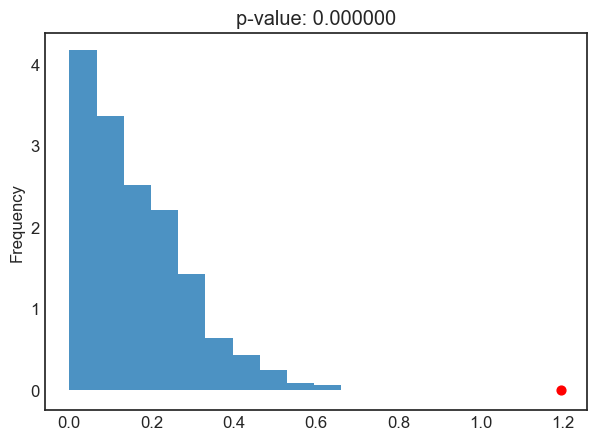

In [35]:
pval = np.mean(means > obs)
pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

### Discussion Question

* We determined that two distributions were likely different because their means were different.
* Can you think of two *different* distributions with the same mean?
* What would our permutation test say about these distributions?

### Different distributions; same mean

What does a permutation test using the test-statistic "difference in means" differentiate between distributions with similar means?

In [36]:
N = 1000 # number of samples for each distribution

# Distribution 'A'
a = pd.Series(np.random.normal(0, 1, size=N//2))
b = pd.Series(np.random.normal(4, 1, size=N//2))
distr1 = pd.concat([a,b], ignore_index=True)

# Distribution 'B'
distr2 = pd.Series(np.random.normal(distr1.mean(), distr1.std(), size=N))

In [37]:
data = pd.concat([distr1, distr2], axis=1, keys=['A', 'B']).unstack().reset_index().drop('level_1', axis=1)
data = data.rename(columns={'level_0': 'group', 0: 'data'})


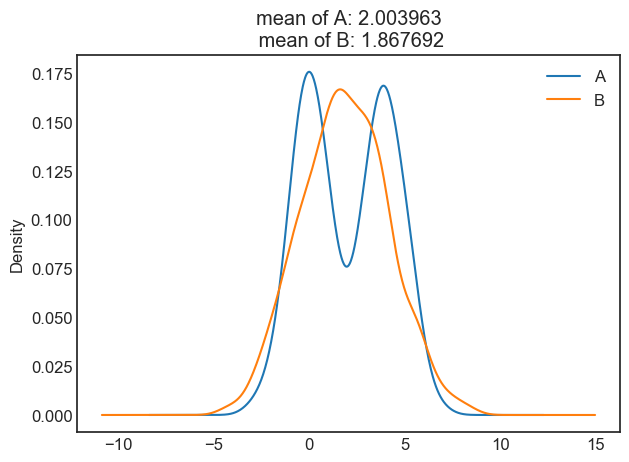

In [38]:
mA, mB = data.groupby('group')['data'].mean().tolist()
title = 'mean of A: %f\n mean of B: %f' % (mA, mB)

data.groupby('group')['data'].plot(kind='kde', legend=True, title=title);

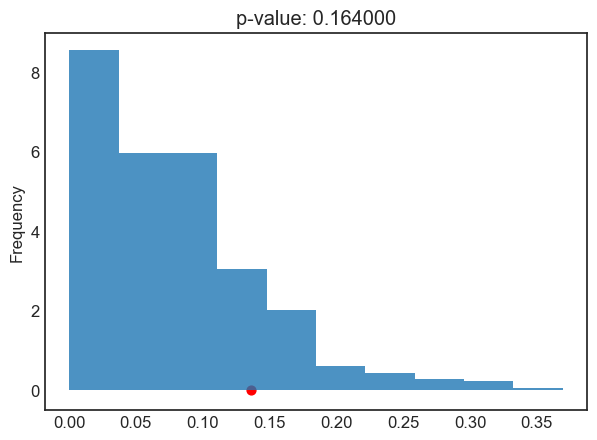

In [39]:
n_repetitions = 500

means = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        data['data']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        data
        .assign(**{
            'data': shuffled_col,
        })
    )
    
    # compute the differences in means
    mean = shuffled.groupby('group')['data'].mean().diff().abs().iloc[-1]
    
    means.append(mean)
    
    
obs = data.groupby('group')['data'].mean().diff().abs().iloc[-1]

pval = np.mean(means > obs)

pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)

plt.scatter(obs, 0, color='red', s=40);

### Telling quantitative distributions apart

* Need a better test-statistic to differentiate between distributions!
* Need a 'distance' between quantitative distributions:
    - Measure the (absolute) difference between probabilities for nearby events?
    - Why can't we use TVD?  (It is not categorical)

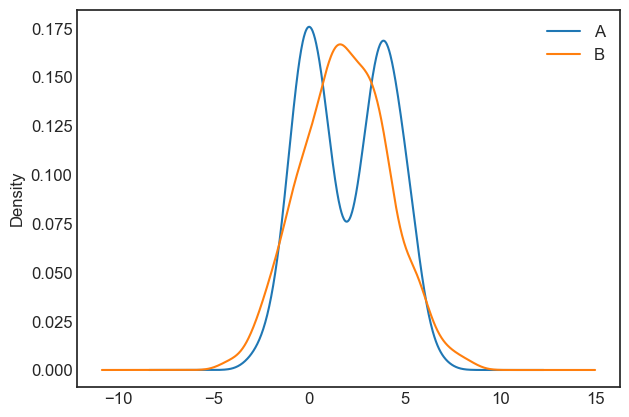

In [40]:
data.groupby('group')['data'].plot(kind='kde', legend=True);

## KS-Statistic
    
* Kolmogorov-Smirnov test-statistic: similarity between two distributions.
* KS-statistics roughly measures the *area* between two empirical distributions.
* Defined using the *Cumulative Distribution Function* instead of density function.
* Python library: `scipy.stats.ks_2samp`

In [41]:
from scipy.stats import ks_2samp

In [42]:
help(ks_2samp)

Help on function ks_2samp in module scipy.stats.stats:

ks_2samp(data1, data2)
    Compute the Kolmogorov-Smirnov statistic on 2 samples.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    are drawn from the same continuous distribution.
    
    Parameters
    ----------
    data1, data2 : sequence of 1-D ndarrays
        two arrays of sample observations assumed to be drawn from a continuous
        distribution, sample sizes can be different
    
    Returns
    -------
    statistic : float
        KS statistic
    pvalue : float
        two-tailed p-value
    
    Notes
    -----
    This tests whether 2 samples are drawn from the same distribution. Note
    that, like in the case of the one-sample K-S test, the distribution is
    assumed to be continuous.
    
    This is the two-sided test, one-sided tests are not implemented.
    The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.
    
    If the K-S statistic is small 

In [21]:
gpA = data.loc[data['group'] == 'A', 'data']
gpB = data.loc[data['group'] == 'B', 'data']

obs = ks_2samp(gpA, gpB).statistic
obs
data

NameError: name 'data' is not defined

In [3]:
n_repetitions = 500

ks_list = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        data['data']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        data
        .assign(**{
            'data': shuffled_col,
        })
    )
    
    # compute the KS
    grps = shuffled.groupby('group')['data']
    ks = ks_2samp(grps.get_group('A'), grps.get_group('B')).statistic
    
    ks_list.append(ks)
    

pval = np.mean(ks_list > obs)

pd.Series(ks_list).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)

plt.scatter(obs, 0, color='red', s=40);

NameError: name 'data' is not defined

### The `ks_2samp` function

* `scipy.stats.ks_2samp` actually returns *both* the statistic *and* a p-value.
* The p-value is calculated using the permutation test we just performed!

In [45]:
ks_2samp(gpA, gpB)

Ks_2sampResult(statistic=0.11399999999999999, pvalue=3.923743560962539e-06)

## Summary: Diagnosing Missingness Mechanisms

### Case: NMAR

* Can you make a reasonable case that the differences in missing vs not missing is largely explainable via *observed* data?
    - If yes, then the missing data (column) 'missing at random' and the missing data is 'ignorable' (when handled properly).
    - If no, then the missing data is 'not missing at random' (NMAR), or 'non-ignorable'. You must explicitly model missingness using assumptions on the data generating process.

## Summary: Diagnosing Missingness Mechanisms

### Case: MAR

* If missingness is explainable via *observed* data, then the missing data is 'missing at random' (MAR).
* The distribution of missing data may still look different than the observed data!
    - MAR requires you to understand how the missingness is dependent on other attributes in your data.
* Use permutation tests to assess the dependence of misssing data on other attributes.

## Summary: Diagnosing Missingness Mechanisms

### Case: MCAR

* If missingness doesn't depend on any values in the observed data, it is 'unconditionally ignorable' (MCAR).
* MCAR is equivalent to data being MAR, without dependence on any other columns.
* If permutation tests point toward similar distributions of missing vs not-missing data, for *every* other column, then the data *may* be MCAR.
    - Caution: you can't assert the data *are* MCAR, as permutation tests don't allow you to accept the null hypothesis!

## Example: Assessing Missingness

* Data on ticketed cars: VIN, Make, Year, Color
* Is car color missing at random, dependent on car year?
    * Are the distributions of year similar when color is null vs not null?
    * How similar is similar enough?
    
Use a permutation test!

In [46]:
cars = pd.read_csv('cars.csv')
cars.head()

,vin,car_make,car_year,car_color
0,3D7TT2CT8BG121773,Audi,2008.0,Teal
1,SCBZB25E62C073475,Audi,1996.0,Mauv
2,1FT7W2A69EE682086,NaN,NaN,Turquoise
3,1B3AZ6JZ7AV582128,Ford,2010.0,Goldenrod
4,1GYUCGEF4AR632425,Mazda,1996.0,Purple


In [47]:
# proportion of car color missing
cars.car_color.isnull().mean()

0.1542

In [48]:
cars['car_color_isnull'] = cars.car_color.isnull()

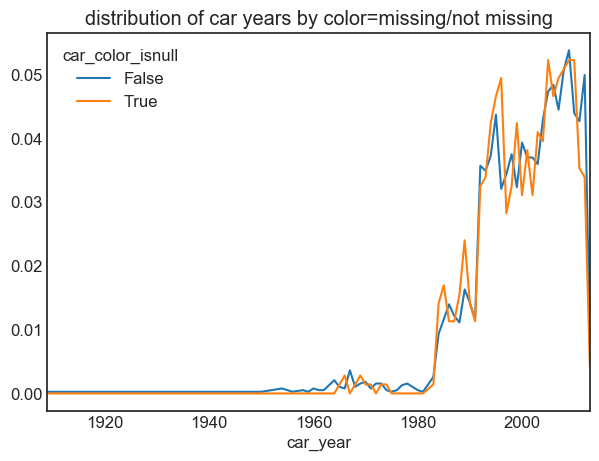

In [49]:
(
    cars
    .pivot_table(index='car_year', columns='car_color_isnull', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
    .plot(title='distribution of car years by color=missing/not missing')
);

### Example: assessing missingness of car make on color

* "Are the two distributions (missing/not missing) of car make generated from the same distribution?"
* Car make is categorical. How to measure similarity without means?
    - use total variation distance

In [50]:
cars['car_make_isnull'] = cars.car_make.isnull()

In [51]:
cars.head()

,vin,car_make,car_year,car_color,car_color_isnull,car_make_isnull
0,3D7TT2CT8BG121773,Audi,2008.0,Teal,False,False
1,SCBZB25E62C073475,Audi,1996.0,Mauv,False,False
2,1FT7W2A69EE682086,NaN,NaN,Turquoise,False,True
3,1B3AZ6JZ7AV582128,Ford,2010.0,Goldenrod,False,False
4,1GYUCGEF4AR632425,Mazda,1996.0,Purple,False,False


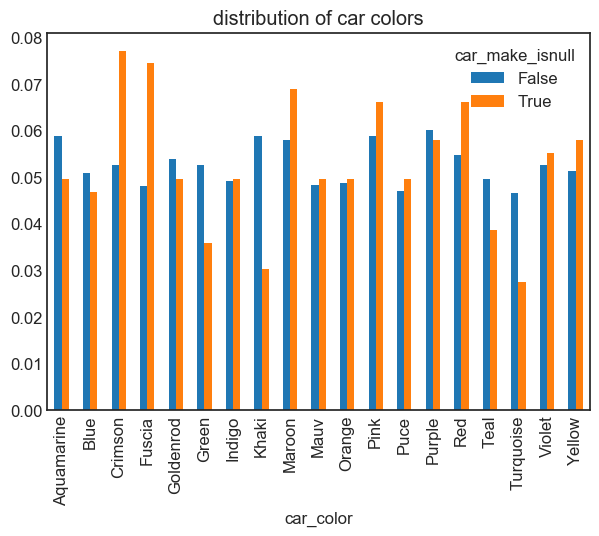

In [52]:
emp_distributions = (
    cars
    .pivot_table(columns='car_make_isnull', index='car_color', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)

emp_distributions.plot(kind='bar', title='distribution of car colors');

In [53]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.0948482140693964

In [54]:
n_repetitions = 500

car_make_color = cars.copy()[['car_color', 'car_make_isnull']]
tvds = []
for _ in range(n_repetitions):
    
    # shuffle the colors
    shuffled_colors = (
        car_make_color['car_color']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        car_make_color
        .assign(**{'Shuffled Color': shuffled_colors})
    )
    
    # compute the tvd
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='car_make_isnull', index='Shuffled Color', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)

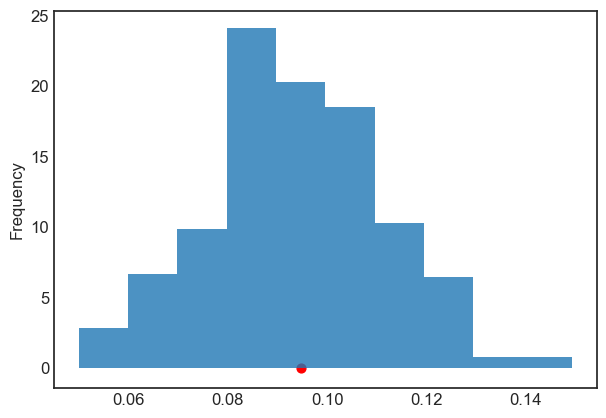

In [55]:
#: visualize
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

### Example: assessing missingness in payments data

* Payment information for purchases: credit card type, credit card number, date of birth.
* Is the credit card number missing at random dependent on the type of card?

In [56]:
payments = pd.read_csv('payment.csv')
payments['cc_isnull'] = payments.credit_card_number.isnull()

In [57]:
payments.head()

,id,credit_card_type,credit_card_number,date_of_birth,cc_isnull
0,1,diners-club-enroute,2.018706e+14,25-Sep-1982,False
1,2,americanexpress,3.737511e+14,08-Jan-1946,False
2,3,jcb,3.570296e+15,NaN,False
3,4,mastercard,5.318327e+15,NaN,False
4,5,maestro,6.759827e+17,20-Apr-1975,False


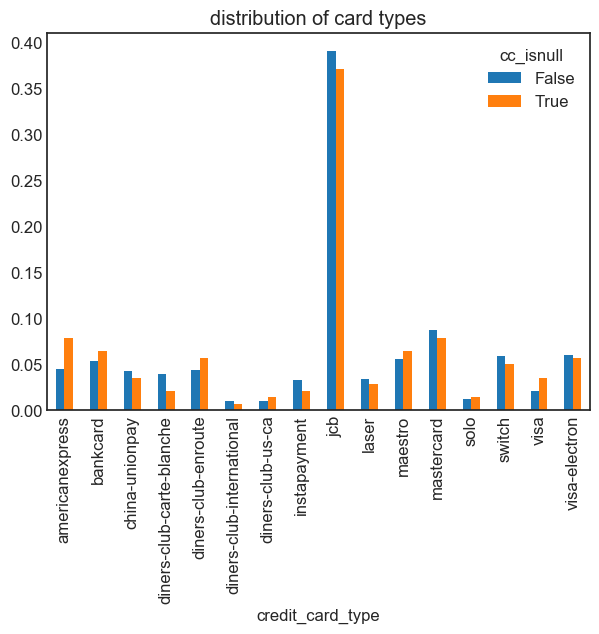

In [58]:
emp_distributions = (
    payments
    .pivot_table(columns='cc_isnull', index='credit_card_type', aggfunc='size')
    .fillna(0)
    .apply(lambda x:x / x.sum())
)

emp_distributions.plot(kind='bar', title='distribution of card types');

In [59]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.08546365914786964

In [60]:
n_repetitions = 500

payments_type = payments.copy()[['credit_card_type', 'cc_isnull']]
tvds = []
for _ in range(n_repetitions):
    
    # shuffle the colors
    shuffled_types = (
        payments_type['credit_card_type']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        payments_type
        .assign(**{'Shuffled Types': shuffled_types})
    )
    
    # compute the tvd
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='cc_isnull', index='Shuffled Types', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)

### Example: assessing missingness in payments data

* Is the credit card number missing at random dependent on the type of card?
* As always, set significance level **beforehand**:
    - How important is the column in the modeling process?
    - How many null values are there?
* Consideration: how important is a faithful imputation?

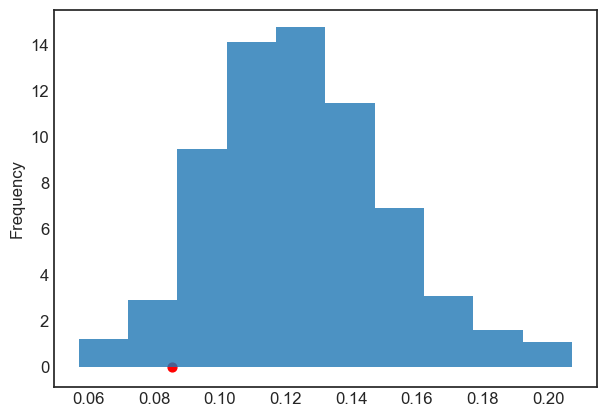

In [61]:
#: visualize
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [62]:
# p-value
np.count_nonzero(tvds <= observed_tvd) / len(tvds)

0.054

### Example: assessing missingness in payments data

* Is the credit card number missing at random dependent on the age of shopper?
* For quantitative distributions, we've compared means of two groups.

In [63]:
payments['date_of_birth'] = pd.to_datetime(payments.date_of_birth)
payments['age'] = (2019 - payments.date_of_birth.dt.year)

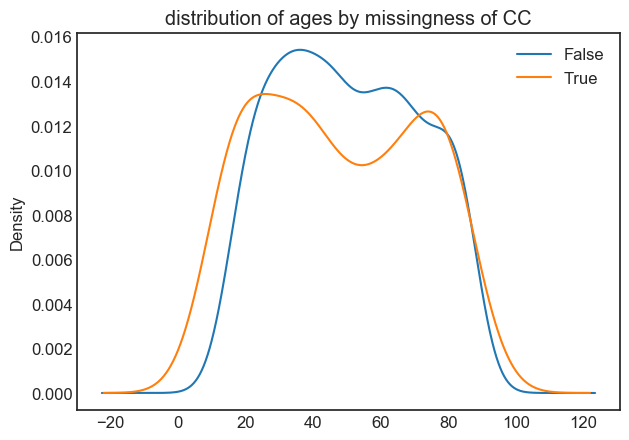

In [64]:
# are the distributions similar?
# Where are the differences? Are they noise, or real?
payments.groupby('cc_isnull').age.plot(kind='kde', title='distribution of ages by missingness of CC', legend=True);

In [65]:
# Run a permutation test
observed_difference, differences = run_perm_test_mean(payments, 'cc_isnull', 'age')

NameError: name 'run_perm_test_mean' is not defined

In [66]:
#: visualize
pd.Series(differences).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_difference, 0, color='red', s=40);

NameError: name 'differences' is not defined

In [67]:
# p-value
np.count_nonzero(differences <= observed_difference) / len(differences)

NameError: name 'differences' is not defined

### Example: assessing missingness in payments data

* Is the credit card number missing at random dependent on the age of shopper?
* The two distributions "look different", but have similar means.
    - Means may be too coarse a statistic
    - Need a different metric for quantitative distributions

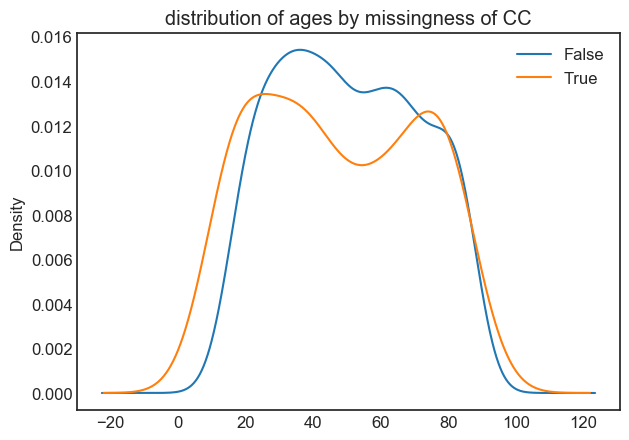

In [68]:
payments.groupby('cc_isnull').age.plot(kind='kde', title='distribution of ages by missingness of CC', legend=True);

In [70]:
plot_pdf_cdf(payments);

NameError: name 'plot_pdf_cdf' is not defined

In [71]:
observed_ks, _ = ks_2samp(
    payments.loc[payments['cc_isnull'], 'age'],
    payments.loc[~payments['cc_isnull'], 'age']
)

In [72]:
observed_ks

0.12699202780883062

In [74]:
n_repetitions = 500

kslist = []
for _ in range(n_repetitions):
    
    # shuffle the ages
    shuffled_age = (
        payments['age']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # 
    shuffled = (
        payments
        .assign(**{'Shuffled Age': shuffled_age})
    )

    ks, _ = ks_2samp(
        shuffled.loc[shuffled['cc_isnull'], 'Shuffled Age'],
        shuffled.loc[~shuffled['cc_isnull'], 'Shuffled Age']
    )
    
    # add it to the list of results
    kslist.append(ks)

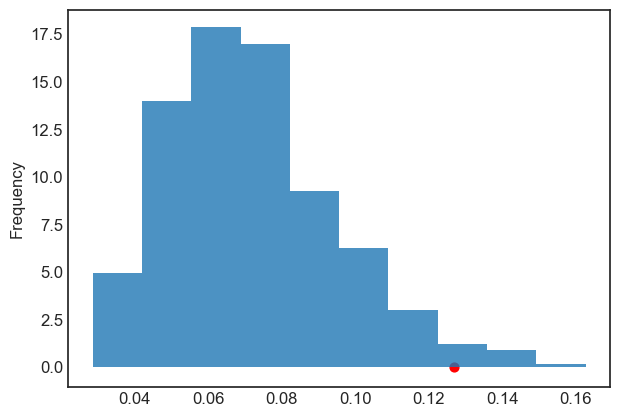

In [75]:
pd.Series(kslist).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_ks, 0, color='red', s=40);

In [76]:
# p-value
np.count_nonzero(kslist >= observed_ks) / len(kslist)

0.026

In [77]:
r = np.random.normal(size=100)
r

array([-0.37614026,  1.35656748, -0.14345238,  0.05895323, -0.29676816,
       -0.26022044,  0.96486521, -2.63068886,  0.55232743, -0.22587244,
       -1.02843867, -1.54777486, -0.75690669,  1.26216354,  0.82637972,
       -1.00248135,  0.0100655 ,  0.43710452, -2.14652161,  1.15138004,
        0.18188753, -0.11684904, -1.13979051, -1.18081133, -0.26629462,
       -1.50524591,  1.44176117,  1.28974718, -0.26506451,  0.85203598,
       -1.38685465,  0.01025465, -0.59731455, -0.18368212, -0.32968147,
        0.38766159, -0.37460167, -1.74836899,  0.73430047,  0.68802283,
       -0.14460233,  2.48057379,  0.28119933,  1.44799758, -1.76546764,
       -2.21689184, -0.49563257,  1.21652623, -0.17366485,  0.1102904 ,
        0.01723109, -0.58658107,  0.40931217, -0.70709855, -0.28869775,
        0.16278852, -0.03249103, -0.14148267, -0.54000941,  0.17573676,
       -0.66193353,  2.21353691,  0.02072324, -0.94757607,  0.78882456,
       -0.68611737, -1.15452413, -1.43521604,  0.68827652,  0.82